# MICCAI MS Lesion Segmentation Challenge(2008)

## 1. Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import skimage.io as io
import os
from IPython.display import HTML

%matplotlib inline

## 2. Get Files Ready

In [2]:
current_dir = os.getcwd()
#print(current_dir)

t1_file = "CHB_train_Case01/CHB_train_Case01_T1.nhdr"
t2_file = "CHB_train_Case01/CHB_train_Case01_T2.nhdr"
flair_file = "CHB_train_Case01/CHB_train_Case01_FLAIR.nhdr"
lesion_file = "CHB_train_Case01/CHB_train_Case01_lesion.nhdr"

## 3. Read File with Scikit-Image Library

In [3]:
file_name = t1_file

img = io.imread(current_dir+"/"+file_name, plugin='simpleitk')
print(type(img),img.shape)

x = img.shape[0]

<class 'numpy.ndarray'> (512, 512, 512)


## 4. Initial Plotting

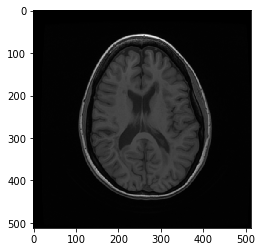

In [4]:
fig = plt.figure()
plot_obj = plt.imshow(img[256,:,:],cmap="gray")

## 5. Update function for Visualization

In [5]:
def update_img(i,transpose=0):
    global img
    # coronal
    if transpose == 1:
        new_img = img.transpose([1,0,2])
    # sagittal
    elif transpose == 2: 
        new_img = img.transpose([2,1,0])
    # axial
    else:
        new_img = img
    data = new_img[i,:,:]
    plot_obj.set_data(data)
    return plot_obj

## 6. Plot T1 Image 

In [6]:
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
# Axial

axis = 0
anim = animation.FuncAnimation(fig,update_img,
                               frames=[i for i in range(x)],
                               fargs=[axis], 
                               interval=30)
HTML(anim.to_html5_video())

In [7]:
# Coronal

axis = 1
anim = animation.FuncAnimation(fig,update_img,
                               frames=[i for i in range(x)],
                               fargs=[axis], 
                               interval=30)
HTML(anim.to_html5_video())

In [8]:
# Sagittal

axis = 2
anim = animation.FuncAnimation(fig,update_img,
                               frames=[i for i in range(x)],
                               fargs=[axis], 
                               interval=30)
HTML(anim.to_html5_video())

## 7. Lesion Area Plotting

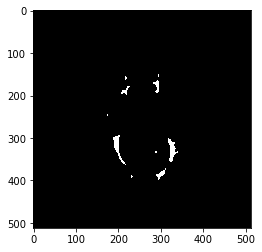

In [9]:
file_name = lesion_file

img = io.imread(current_dir+"/"+file_name, plugin='simpleitk')

fig = plt.figure()
plot_obj = plt.imshow(img[256,:,:],cmap="gray")

In [10]:
axis = 0
anim = animation.FuncAnimation(fig,update_img,
                               frames=[i for i in range(x)],
                               fargs=[axis], 
                               interval=30)
HTML(anim.to_html5_video())